# Project: Wrangle and Analyze Data

## Preparation

In [1]:
import requests
import pandas as pd
import tweepy
import time
import sys
import json
import matplotlib.pyplot as plt
%matplotlib inline


# setting up tweepy
consumer_key = 'Spa6JuZzzfaKj4cmC0cn5SOEW'
consumer_secret = 'VQw5HarkVT2uRBiIg8uKWd6jZdT3lhItzx2Lp0TwKCmWadZ35s'
access_token = '1078358846576476160-5cKobEvDybSd61B7KWQvxBxIDfBd60'
access_secret = 'zE5InMhoB6mc4ErZYGQbCf1oj26u5UhlAP8RoisB1I3OD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Gather

In [2]:
# reading the provided file 'twitter-archive-enhanced.csv' into a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading the file: image-predictions.tsv
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
with open('image-predictions.tsv', 'w') as file:
    file.write(r.decode('utf-8'))


In [4]:
# reading the downloaded file into a dataframe
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# creating an empty list for the statuses details of every tweet
list_of_tweets = []

# iterating over every status and saving the json-ified details into a list
for id in df_image.tweet_id:
    try:
        status = api.get_status(id, tweet_mode='extended')
        list_of_tweets.append(status._json)
        time.sleep(0.1)
    except:
        print('Error for ' + str(id))

# saving the list as a file
with open('tweet_json.txt', 'w') as file:
      json.dump(list_of_tweets, file)

Error for 680055455951884288
Rate limit reached. Sleeping for: 652
Error for 754011816964026368
Error for 802247111496568832
Rate limit reached. Sleeping for: 650
Error for 837012587749474308
Error for 842892208864923648
Error for 861769973181624320
Error for 873697596434513921
Error for 888202515573088257


In [6]:
# reading the created file into a dataframe
df_tweet = pd.read_json('tweet_json.txt')

## Assess

### Assessing df_archive

In [7]:
df_archive.head(n=10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# checking for duplicate tweet_ids
df_archive.tweet_id.duplicated().sum()

0

In [10]:
# checking the amount of "doggos"
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
# checking the amount of "floofer"
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
# checking the amount of "puppers"
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
# checking the amount of "puppos"
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
# getting the number of entries without a categorization 
df_archive[(df_archive.doggo == 'None') & (df_archive.floofer == 'None') & (df_archive.pupper == 'None') & (df_archive.puppo == 'None')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     1976 non-null object
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null object
expanded_urls                 1923 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
doggo                         1976 non-null object
floofer                       1976 non-null object
pupper                        1976 non-null object
puppo                         1976 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# getting the number of rows where rating_numerator is above 13
df_archive.rating_numerator[df_archive.rating_numerator > 13].count()

82

In [17]:
# getting the number of rows where rating_numerator is above 13
df_archive.rating_denominator[df_archive.rating_denominator > 10].count()

20

### Assessing df_image

In [18]:
df_image.head(n=10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# how many rows are there where p1_dog is False?
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [21]:
# how many rows are there where p2_dog is False?
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [22]:
# how many rows are there where p3_dog is False?
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [23]:
# getting the number of rows in which are no dogs
df_image[(df_image.p1_dog == False) & (df_image.p2_dog == False) & (df_image.p3_dog == False)].shape[0]

324

In [24]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing df_tweet

In [26]:
df_tweet.head(n=5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2538,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,en,None,False,False,502,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",126,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,en,None,False,False,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",123,False,Here is a very happy pup. Big fan of well-main...,NaN,...,en,None,False,False,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",293,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,en,None,False,False,139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",107,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,en,None,False,False,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [27]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null bool
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

In [28]:
df_tweet.favorited.value_counts()

False    2067
Name: favorited, dtype: int64

In [29]:
df_tweet.is_quote_status.value_counts()

False    2067
Name: is_quote_status, dtype: int64

In [30]:
df_tweet.possibly_sensitive.value_counts()

False    2067
Name: possibly_sensitive, dtype: int64

In [31]:
df_tweet.possibly_sensitive_appealable.value_counts()

False    2067
Name: possibly_sensitive_appealable, dtype: int64

In [32]:
df_tweet.retweeted.value_counts()

False    2067
Name: retweeted, dtype: int64

In [33]:
df_tweet.truncated.value_counts()

False    2067
Name: truncated, dtype: int64

In [34]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null bool
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

In [35]:
df_tweet.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,retweet_count
count,0.0,0.0,2067.000000,0.0,2.067000e+03,2.067000e+03,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2067.000000
mean,NaN,NaN,8413.056120,NaN,7.381455e+17,7.381455e+17,6.978112e+17,6.978112e+17,4.196984e+09,4.196984e+09,2802.655539
std,NaN,NaN,12673.926371,NaN,6.768193e+16,6.768193e+16,4.359384e+16,4.359384e+16,0.000000e+00,0.000000e+00,4876.792534
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,12.000000
25%,NaN,NaN,1600.000000,NaN,6.764355e+17,6.764355e+17,6.732411e+17,6.732411e+17,4.196984e+09,4.196984e+09,596.500000
50%,NaN,NaN,3696.000000,NaN,7.117327e+17,7.117327e+17,6.757073e+17,6.757073e+17,4.196984e+09,4.196984e+09,1321.000000
75%,NaN,NaN,10519.000000,NaN,7.931430e+17,7.931430e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,3232.000000
max,NaN,NaN,164299.000000,NaN,8.924206e+17,8.924206e+17,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,83666.000000


### Issues - Quality

1. *df_archive*: in_reply_to_status_id, in_reply_to_user_id: to few values and will therefore not provide enough information
2. *df_archive*: source contains html tags
3. *df_archive*: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp to few values and will therefore not provide enough information
4. *df_image* contains rows without dogs.

5. *df_tweet*: contributors, coordinates, geo: columns are all empty and are obsolete
6. *df_tweet*: favorited, is_quote_status, possibly_sensitive, possibly_sensitive_appealable, retweeted, truncated: all values are False and provide therefore no viable information
7. *df_tweet*: source: containts html tag and is furthermore a duplicate and therefore obsolete
8. *df_tweet*: in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, retweeted_status: contain very few entries and provide not helpful information

9. *df_tweet*: display_text_range, entities, extended_entities, user: seem to be of no use
10. the number of tweets in each dataframe differ from each other.

### Issues - Tidiness

1. *df_archive*: contains information about the type of dog in four columns (doggo, floofer, pupper, puppo).
2. *df_image*: contains 3x2 rows with duplicate information (p1, p1_dog, p2, p2_dog, p3, p3_dog)
3. *df_tweet*: colums id and id_str are identical

## Clean

In [36]:
# making copies of the initial dataframes
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

### Cleaning Quality issue 1

In [37]:
# dataframe: df_archive_clean
# dropping the columns in_reply_to_status_id, in_reply_to_user_id
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [38]:
# checking number of columns (last count: 17)
df_archive_clean.shape[1]

15

### Cleaning Quality issue 2

In [39]:
# dataframe: df_archive_clean
# extracting the value of column source
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
df_archive_clean.source = df_archive_clean.source.apply(lambda x: str(x[x.find(">")+1:x.find("/a>")-1]))

In [41]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Cleaning Quality issue 3

In [42]:
# dataframe: df_archive_clean
# dropping the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                                          'retweeted_status_timestamp'], axis=1)

In [43]:
# checking number of columns (last count: 15)
df_archive_clean.shape[1]

12

### Cleaning Quality issue 4

In [44]:
# dataframe: df_image_clean
# dropping rows where there are no dogs
df_image_clean = df_image_clean.drop(df_image_clean[(df_image_clean.p1_dog == False) & 
                                      (df_image_clean.p2_dog == False) & 
                                      (df_image_clean.p3_dog == False)].index, axis=0)

In [45]:
# checking number of rows (last count: 2075)
df_image_clean.shape[0]

1751

### Cleaning Quality issue 5

In [46]:
# dataframe: df_tweet_clean
# dropping the columns contributors, coordinates, geo
df_tweet_clean = df_tweet_clean.drop(['contributors', 'coordinates', 'geo'], axis=1)

In [47]:
# checking number of columns (last count: 28)
df_tweet_clean.shape[1]

25

### Cleaning Quality issue 6

In [48]:
# dataframe: df_tweet_clean
# dropping the columns favorited, is_quote_status, possibly_sensitive, possibly_sensitive_appealable, retweeted, truncated 
df_tweet_clean = df_tweet_clean.drop(['favorited', 'is_quote_status', 'possibly_sensitive', 
                                      'possibly_sensitive_appealable', 'retweeted', 'truncated'], axis=1)

In [49]:
# checking number of columns (last count: 25)
df_tweet_clean.shape[1]

19

### Cleaning Quality issue 7

In [50]:
# dataframe: df_tweet_clean
# dropping column source
df_tweet_clean = df_tweet_clean.drop(['source'], axis=1)

In [51]:
# checking number of columns (last count: 19)
df_tweet_clean.shape[1]

18

### Cleaning Quality issue 8

In [52]:
# dataframe: df_tweet_clean
# dropping the columns: in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place, retweeted_status
df_tweet_clean = df_tweet_clean.drop(['in_reply_to_screen_name', 'in_reply_to_status_id', 
                                      'in_reply_to_status_id_str', 'in_reply_to_user_id', 
                                      'in_reply_to_user_id_str', 'place', 'retweeted_status'], axis=1)

In [53]:
# checking number of columns (last count: 18)
df_tweet_clean.shape[1]

11

### Cleaning Quality issue 9

In [54]:
# dataframe: df_tweet_clean
# dropping the columns: display_text_range, entities, extended_entities, user
df_tweet_clean = df_tweet_clean.drop(['display_text_range', 'entities', 'extended_entities', 'user'], axis=1)

In [55]:
# checking number of columns (last count: 11)
df_tweet_clean.shape[1]

7

### Cleaning Tidiness issue 1

In [56]:
# dataframe: df_archive_clean
# contains information about the type of dog in four columns (doggo, floofer, pupper, puppo).
multiple_dogs = (list(df_archive_clean[df_archive_clean.doggo == 'doggo'].index) + 
                 list(df_archive_clean[df_archive_clean.floofer == 'floofer'].index) + 
                 list(df_archive_clean[df_archive_clean.pupper == 'pupper'].index) +
                 list(df_archive_clean[df_archive_clean.puppo == 'puppo'].index))

In [57]:
# iterating over the list containing index numbers where multiple dogs are in a row
# and creating a dictionary 
duplicate_entries = dict()
for x in multiple_dogs:
    duplicate_entries[x] = duplicate_entries.get(x, 0) + 1

# iterating over the dictionary duplicate_entries and appending the keys (indexes) to a list
rows_to_drop = []
for k, v in duplicate_entries.items():
    if v > 1:
        rows_to_drop.append(k)


In [58]:
# number of columns to drop in df_archive_clean
len(rows_to_drop)

14

In [59]:
# dropping the rows
df_archive_clean = df_archive_clean.drop(df_archive_clean.index[rows_to_drop], axis=0)

In [60]:
# comparing the shapes (initial row count was: 2356)
df_archive_clean.shape

(2342, 12)

In [61]:
# creating a new column 'type_of_dogs' and filling it depending on the contents of the rows doggo, floofer, pupper, puppo, None
df_archive_clean['type_of_dog'] = df_archive_clean.apply(lambda x: 'doggo' if x.doggo == 'doggo' 
                                                           else 'floofer' if x.floofer == 'floofer' 
                                                           else 'pupper' if x.pupper == 'pupper' 
                                                           else 'puppo' if x.puppo == 'puppo' 
                                                           else 'None', axis=1)

# dropping unnecessary rows 
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [62]:
# comparing the shapes (previous column count was: 12)
df_archive_clean.shape

(2342, 9)

### Cleaning Tidiness issue 2

In [63]:
# dataframe: df_image_clean
# contains 3x2 rows with duplicate information (p1, p1_dog, p2, p2_dog, p3, p3_dog)
df_image_clean['prediction'] = df_image_clean.apply( lambda x: 'dogs' if (x.p1_dog == True) & (x.p2_dog == True) & (x.p3_dog == True) 
                                                      else 'no_dogs' if (x.p1_dog == False) & (x.p2_dog == False) & (x.p3_dog == False)
                                                      else 'mixed', axis=1)



In [64]:
df_image_clean.head(n=15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,dogs
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,dogs
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,dogs
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,dogs
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,dogs
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,dogs
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,mixed
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,mixed
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,dogs
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,dogs


In [65]:
# dropping the columns p1_dog, p2_dog and p3_dog
df_image_clean = df_image_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

In [66]:
df_image_clean.head(n=10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,dogs
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,dogs
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,dogs
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,dogs
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,dogs
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,English_springer,0.263788,Greater_Swiss_Mountain_dog,0.016199,dogs
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,Tibetan_mastiff,0.058279,fur_coat,0.054449,mixed
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,shopping_basket,0.014594,golden_retriever,0.007959,mixed
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086,dogs
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,Tibetan_mastiff,0.093718,Labrador_retriever,0.072427,dogs


### Cleaning Tidiness issue 3

In [67]:
# dataframe: df_tweet_clean
# dropping column id_str
df_tweet_clean = df_tweet_clean.drop(['id_str'], axis=1)

### Combining all three datasets into one

In [68]:
df_master = df_archive_clean.merge(
    df_image_clean, left_on='tweet_id', right_on='tweet_id').merge(
    df_tweet_clean, left_on='tweet_id', right_on='id')

In [69]:
df_master.head(n=10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog,jpg_url,...,p2_conf,p3,p3_conf,prediction,created_at,favorite_count,full_text,id,lang,retweet_count
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,papillon,0.068957,dogs,2017-08-01 00:17:27,32659,This is Tilly. She's just checking pup on you....,892177421306343426,en,6145
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,kelpie,0.031379,dogs,2017-07-31 00:18:03,24582,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,en,4069
2,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,spatula,0.040836,mixed,2017-07-30 15:58:51,41387,This is Darla. She commenced a snooze mid meal...,891689557279858688,en,8464
3,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,German_short-haired_pointer,0.175219,dogs,2017-07-29 16:00:24,39578,This is Franklin. He would like you to stop ca...,891327558926688256,en,9162
4,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.116317,Indian_elephant,0.076902,mixed,2017-07-29 00:08:17,19871,Here we have a majestic great white breaching ...,891087950875897856,en,3049
5,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.199287,ice_lolly,0.193548,mixed,2017-07-28 16:27:12,11617,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,en,2019
6,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.178406,Pembroke,0.076507,dogs,2017-07-28 00:22:40,64197,When you watch your owner call another dog a g...,890729181411237888,en,18457
7,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.193054,Chesapeake_Bay_retriever,0.118184,dogs,2017-07-27 16:25:51,27305,This is Zoey. She doesn't want to be one of th...,890609185150312448,en,4188
8,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.451038,Chihuahua,0.029248,dogs,2017-07-26 15:59:51,31322,This is Cassie. She is a college pup. Studying...,890240255349198849,en,7215
9,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.013884,chow,0.008167,dogs,2017-07-26 00:31:25,30102,This is Koda. He is a South Australian decksha...,890006608113172480,en,7176


In [70]:
# further cleaning: dropping timestamp and id
df_master = df_master.drop(['timestamp', 'id'], axis=1)

In [71]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 0 to 1731
Data columns (total 22 columns):
tweet_id              1732 non-null int64
source                1732 non-null object
text                  1732 non-null object
expanded_urls         1732 non-null object
rating_numerator      1732 non-null int64
rating_denominator    1732 non-null int64
name                  1732 non-null object
type_of_dog           1732 non-null object
jpg_url               1732 non-null object
img_num               1732 non-null int64
p1                    1732 non-null object
p1_conf               1732 non-null float64
p2                    1732 non-null object
p2_conf               1732 non-null float64
p3                    1732 non-null object
p3_conf               1732 non-null float64
prediction            1732 non-null object
created_at            1732 non-null datetime64[ns]
favorite_count        1732 non-null int64
full_text             1732 non-null object
lang                  1732 

### Storing the cleaned data

In [72]:
df_master.to_csv('twitter_archive_master.csv')

## Analysis and Visualization

### Is there a correlation betweet *favorite_count* and *retweet_count*?

In [73]:
# correlation between favorite_count and retweet_count
df_master.favorite_count.corr(df_master.retweet_count)

0.8644509447766614

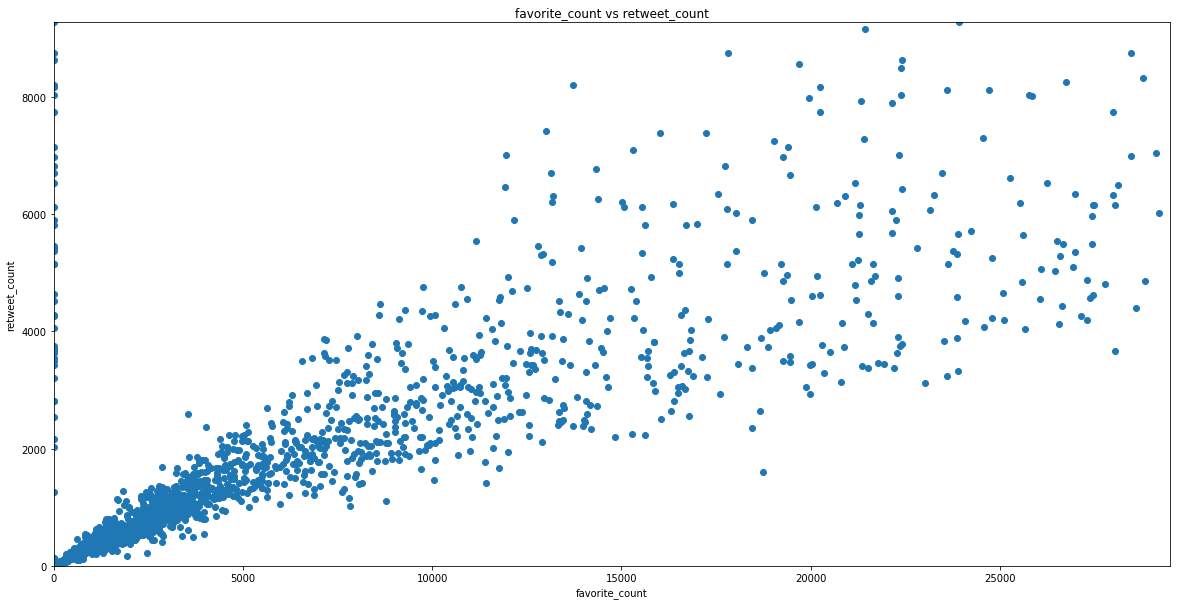

In [74]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.scatter(df_master.favorite_count, df_master.retweet_count)
plt.xlim(0,df_master.favorite_count.quantile(0.95))
plt.ylim(0,df_master.retweet_count.quantile(0.95))
plt.title('favorite_count vs retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

The correlation of 0.86 indicates a strong correlation between the favorite_count and retweet_count. This means that tweet which are favorited are more likely to be retweeted and vice versa.

### What *type_of_dog* is favorited the most on average?

In [75]:
df_master.groupby(['type_of_dog']).favorite_count.mean().sort_values(ascending=False)

type_of_dog
puppo      20739.727273
doggo      19306.017544
floofer    12675.285714
None        8284.891452
pupper      7157.209302
Name: favorite_count, dtype: float64

It looks like dogs being categorized as "puppo" are the ones which are favorited the most on average. Dogs of the type 'pupper' on the other hand seem to be not that popular.

### Is there a correlation betweet *favorite_count* and the rating?

In [76]:
# calculating the rating by dividing rating_numerator by rating_denominator
df_master.rating = df_master.rating_numerator / df_master.rating_denominator

In [77]:
# correlation between favorite_count and the rating
df_master.favorite_count.corr(df_master.rating)

0.27523332570609893

There is a positive correlation between favorite_count and the rating but it is quite small. It means that you can expect a tweet with a good rating to be favorited.

### Is there a correlation betweet *retweet_count* and the rating?

In [78]:
# correlation between retweet_count and the rating
df_master.retweet_count.corr(df_master.rating)

0.2234346154127077

The correlation is a little lower than the on between favorite_count and rating but its existent and positive. It means that a tweet with a better rating tends to be retweeted more. 